<a href="https://colab.research.google.com/github/sabiretutardemir/100-Day-ML-Codes-Challenge/blob/main/Neural_Networks_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [10]:
df=pd.read_csv("/content/mnist.csv")

In [11]:
df.head()

,id,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,31953,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34452,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60897,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1981,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Set the 'id' column as the index
df.set_index('id', inplace=True)

In [14]:
df.shape

(4000, 785)

In [16]:
X = df.drop(columns=['class'])  # Replace 'label' with your target column name
y = df['class']  # Your target column

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [24]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
}

cv_results = cross_validate(perceptron, X_train, y_train, cv=5, scoring=scoring)

# Print out the results
print(f"Average Accuracy: {cv_results['test_accuracy'].mean() * 100:.2f}%")
print(f"Average Precision: {cv_results['test_precision'].mean() * 100:.2f}%")
print(f"Average Recall: {cv_results['test_recall'].mean() * 100:.2f}%")
print(f"Average F1 Score: {cv_results['test_f1'].mean() * 100:.2f}%")


Average Accuracy: 86.34%
Average Precision: 86.60%
Average Recall: 86.34%
Average F1 Score: 86.23%


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4],
    'eta0': [1.0, 0.1],  # Learning rate
}

grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'eta0': 1.0, 'max_iter': 1000, 'tol': 0.001}


In [25]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Create a new Perceptron model with best parameters
optimized_perceptron = Perceptron(
    max_iter=best_params['max_iter'],
    tol=best_params['tol'],
    eta0=best_params.get('eta0', 1.0),
    random_state=42
)

# Fit the model to the training data
optimized_perceptron.fit(X_train, y_train)


cv_results_opt = cross_validate(optimized_perceptron, X_train, y_train, cv=5, scoring=scoring)

# Print out the results
print(f"Average Accuracy: {cv_results_opt['test_accuracy'].mean() * 100:.2f}%")
print(f"Average Precision: {cv_results_opt['test_precision'].mean() * 100:.2f}%")
print(f"Average Recall: {cv_results_opt['test_recall'].mean() * 100:.2f}%")
print(f"Average F1 Score: {cv_results_opt['test_f1'].mean() * 100:.2f}%")


Best Parameters: {'eta0': 1.0, 'max_iter': 1000, 'tol': 0.001}
Average Accuracy: 86.34%
Average Precision: 86.60%
Average Recall: 86.34%
Average F1 Score: 86.23%


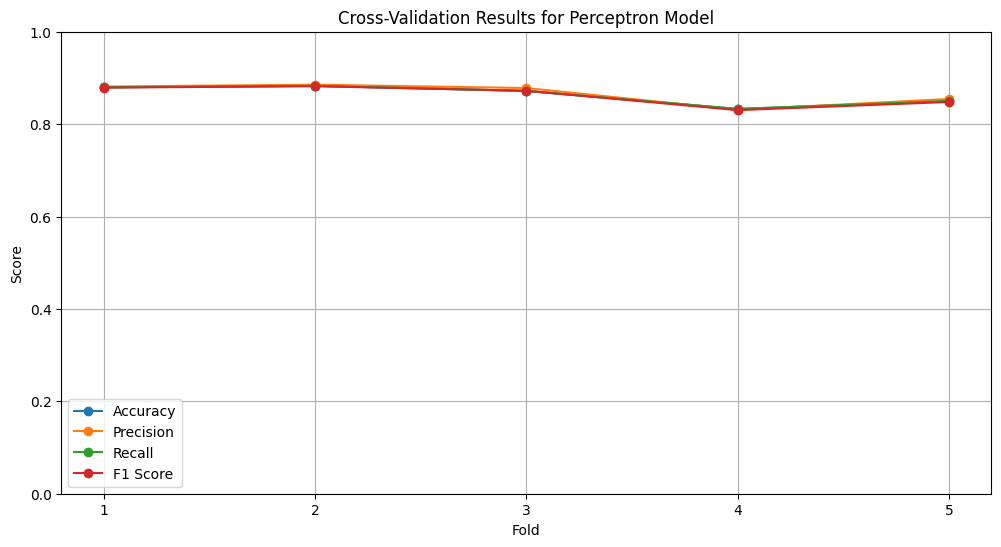

In [28]:
# Extract the metrics
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1']

# Create a DataFrame for better handling
results_df = pd.DataFrame({
    'Fold': np.arange(1, len(accuracy_scores) + 1),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Plotting the metrics
plt.figure(figsize=(12, 6))

# Plot each metric
for metric in results_df.columns[1:]:
    plt.plot(results_df['Fold'], results_df[metric], marker='o', label=metric)

# Adding titles and labels
plt.title('Cross-Validation Results for Perceptron Model')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.xticks(results_df['Fold'])
plt.ylim(0, 1)  # Set y-limits for better visualization
plt.grid()
plt.legend()
plt.show()


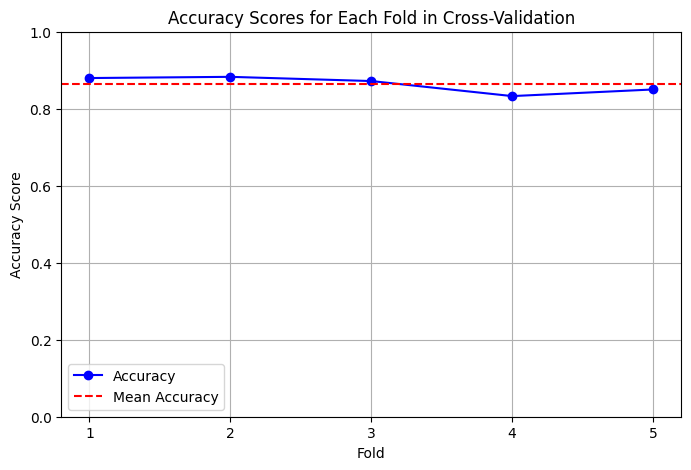

In [29]:
# Plotting the accuracy scores
plt.figure(figsize=(8, 5))
plt.plot(results_df['Fold'], results_df['Accuracy'], marker='o', color='b', label='Accuracy')

# Adding titles and labels
plt.title('Accuracy Scores for Each Fold in Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.xticks(results_df['Fold'])
plt.ylim(0, 1)  # Set y-limits for better visualization
plt.grid()
plt.axhline(y=results_df['Accuracy'].mean(), color='r', linestyle='--', label='Mean Accuracy')  # Add mean accuracy line
plt.legend()
plt.show()

Accuracy on Test Set: 84.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.81      0.97      0.88       100
           2       0.78      0.85      0.82        73
           3       0.87      0.77      0.81        86
           4       0.91      0.86      0.88        80
           5       0.60      0.86      0.71        64
           6       0.95      0.90      0.93        90
           7       0.97      0.90      0.93        67
           8       0.83      0.56      0.67        94
           9       0.81      0.80      0.81        76

    accuracy                           0.84       800
   macro avg       0.85      0.85      0.84       800
weighted avg       0.85      0.84      0.84       800



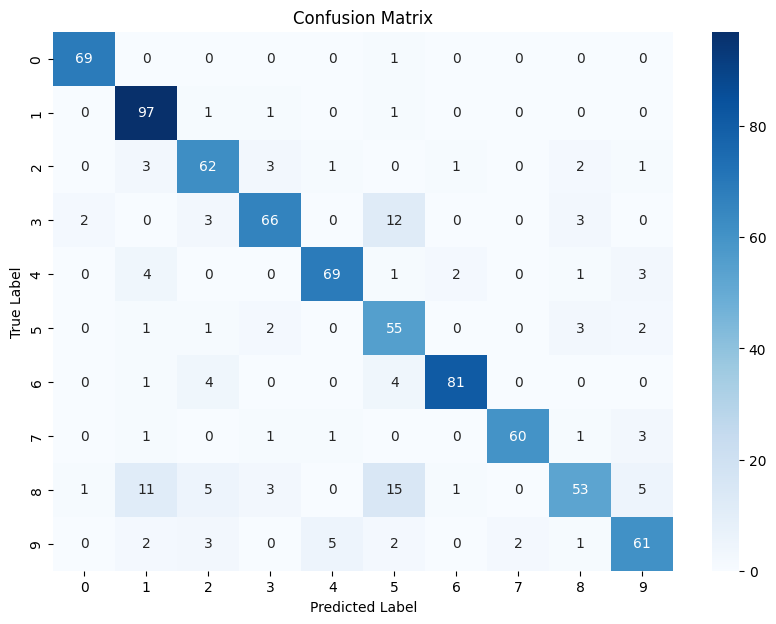

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Test the model on the test set
y_pred = optimized_perceptron.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')
print("\nClassification Report:\n", report)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()